# Базовый уровень

*Для получения положительной оценки нужно правильно выполнить не менее 3 заданий из 5*

## Задание 1.1

Загрузите первый лист (`curr`) из файла `data.xlsx` в `pd.DataFrame` (в этой таблице приведены курсы доллара (USD) и евро (EUR) в рублях).

In [176]:
import pandas as pd
import numpy as np
%matplotlib inline
df = pd.read_excel('./data.xlsx')
df.head()

,Date,USD,EUR
0,2013-06-22,32.7433,43.3489
1,2013-06-25,32.9097,43.1018
2,2013-06-26,32.7140,42.9698
3,2013-06-27,32.8876,42.9841
4,2013-06-28,32.8766,42.8349


## Задание 1.2

Выведите на экран тип поля `Date`. Если это `datetime64[ns]` или `<M8[ns]` (по сути то же самое), то мы имеем дело с правильным форматом даты. Если нет, приведите этот столбец к типу `datetime`.

In [38]:
df.Date.dtype

dtype('<M8[ns]')

## Задание 1.3

Выведите на экран минимальную и максимальную дату. Сколько всего дней содержится в наших данных? (*Hint: даты можно вычитать друг из друга*)

In [39]:
minD = df.Date.min()
maxD = df.Date.max()
print 'max:', maxD
print 'min:', minD
print 'интервал дат:', maxD - minD
print 'количество дней:',df.Date.nunique()

max: 2017-06-21 00:00:00
min: 2013-06-22 00:00:00
интервал дат: 1460 days 00:00:00
количество дней: 988


## Задание 1.4

Постройте на одном графике курс доллара и курс евро.

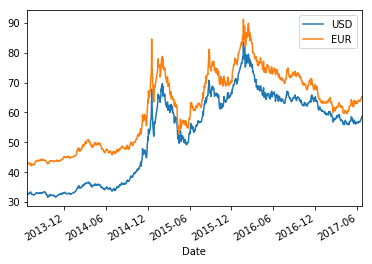

In [177]:
df.set_index('Date', inplace=True)
df.plot();

## Задание 1.5

Найдите среднее значение курса евро в мае 2017 года.

In [155]:
df.loc['2017-05', 'EUR'].mean()

62.95527368421053

# Продвинутый уровень

*Для получения положительной оценки нужно правильно выполнить не менее 3 заданий из 5*

## Задание 2.1

Найдите долю дней, когда доллар растет.

In [157]:
(df.USD/df.USD.shift(-1)>1).mean()

0.47267206477732793

## Задание 2.2

Постройте гистограмму доходности доллара.

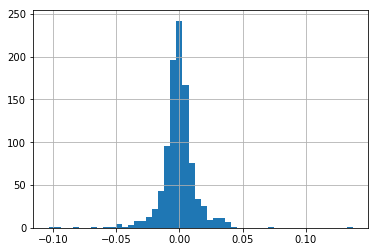

In [169]:
(df.USD/df.USD.shift(-1)-1).hist(bins=50)


## Задание 2.3

Добавьте в таблицу новую колонку `Weekday` – день недели на русском языке, т.е. строку со значением `u'понедельник'`, `u'вторник'` и т.д. (*Hint: удобно воспользоваться атрибутом* `.dt`)

In [178]:
days = { 0 : 'понедельник', 1 : 'вторник', 2 :'среда', 3:'четверг',4:'пятница',5:'суббота',6:'воскресенье'}
df['Weekday'] = df.index.to_series().dt.weekday.apply(lambda a: days[a])
df.head()

,USD,EUR,Weekday
Date,,,
2013-06-22,32.7433,43.3489,суббота
2013-06-25,32.9097,43.1018,вторник
2013-06-26,32.7140,42.9698,среда
2013-06-27,32.8876,42.9841,четверг
2013-06-28,32.8766,42.8349,пятница


## Задание 2.4

Рассчитайте корреляцию между курсами доллара и евро за весь доступный период (*Hint: в pandas уже встроена функция для расчета корреляций*).

In [74]:
df.corr()

,USD,EUR
USD,1.000000,0.982309
EUR,0.982309,1.000000


## Задание 2.5

Несколько лет назад курс евро отличался от курса доллара значительно сильнее, чем сейчас. Чтобы это визуализировать, вычислите курс евро к доллару (т.е. "сколько долларов стоит один евро") за каждый день. Постройте график курса евро к доллару за весь доступный период.

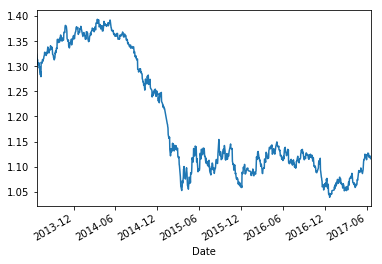

In [76]:
(df.EUR/df.USD).plot();

# Сложный уровень

*Для получения положительной оценки нужно правильно выполнить не менее 3 заданий из 5*

## Задание 3.1

Загрузите второй лист (`oil`) из файла `data.xlsx` в `pd.DataFrame` (в этой таблице приведены цены за баррель нефти Brent в долларах США).

In [80]:
df2 = pd.read_excel('./data.xlsx', sheetname=1, index_col='dt')
df2.head()

,Brent
dt,
2013-01-02,112.98
2013-01-03,113.03
2013-01-04,112.58
2013-01-07,112.49
2013-01-08,113.03


## Задание 3.2

Объедините обе таблицы в одну. Итоговая таблица должна содержать дату в качестве индекса, а также поля `USD` (доллар), `EUR` (евро) и `Brent` (нефть). Обратите внимание, что периоды, за которые доступны данные, немного отличаются для курсов валют и для нефти. Нас интересует только тот период, когда и те, и другие данные присутствуют.

In [84]:
dfMerged = pd.merge(df,df2,how='inner', left_index=True, right_index=True)
dfMerged.head()

,USD,EUR,Weekday,Brent
2013-06-25,32.9097,43.1018,вторник,101.51
2013-06-26,32.7140,42.9698,среда,100.62
2013-06-27,32.8876,42.9841,четверг,102.74
2013-06-28,32.8766,42.8349,пятница,102.49
2013-07-02,32.8517,42.8025,вторник,103.96


## Задание 3.3

- Постройте на одном графике курсы валют и цены не нефть. Поскольку цена на нефть имеет немного другой масштаб, используйте параметр `secondary_y='Brent'` для отображения дополнительной оси $y$ справа.
- Посчитайте попарные корреляции всех трех временных рядов за весь период.

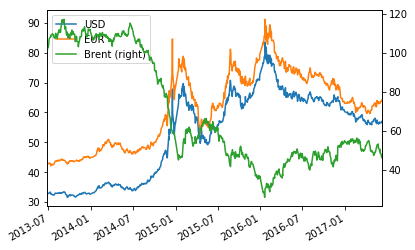

In [86]:
dfMerged.plot(secondary_y='Brent');

## Задание 3.4

Определите, в какие дни недели лучше покупать евро, а в какие – продавать. Для этого рассчитайте среднюю доходность евро в разные дни недели (т.е. нужно сгруппировать таблицу по дням недели и рассчитать среднее процентное изменение курса евро в каждой группе).

In [184]:
df['profitEUR']=(df.EUR/df.EUR.shift(-1)-1)*100
df.groupby('Weekday').profitEUR.mean()


Weekday
воскресенье    2.115181
вторник       -0.065406
пятница       -0.111197
среда          0.005609
суббота       -0.154072
четверг        0.155066
Name: profitEUR, dtype: float64

## Задание 3.5

Постройте график "скользящей корреляции" между курсами доллара и евро (таким образом можно найти периоды, когда курсы коррелировали слабее обычного и использовать это для арбитража). Для этого нужно взять скользящее окно (например, 60 последних значений) и рассчитать корреляцию USD - EUR внутри каждого такого окна.


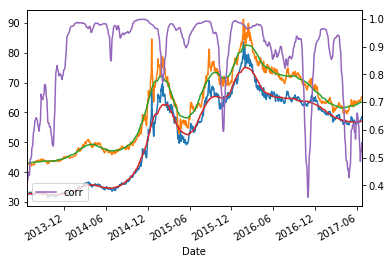

In [217]:
import matplotlib.pyplot as plt

windowEUR = df.EUR.rolling(60, min_periods=1, center=True)
windowUSD = df.USD.rolling(60, min_periods=1, center=True)

df.USD.plot()
df.EUR.plot()
windowEUR.mean().plot(label='average EUR')
windowUSD.mean().plot(label='average USD')

windowUSD.corr(windowEUR).plot(secondary_y=True, label='corr')

plt.legend();
